# **Classification** **#CODEDANIEL**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
%matplotlib inline 


**pandas:** a library for data manipulation and analysis. It provides data structures for efficiently storing and manipulating large datasets, as well as functions for importing and exporting data from various file formats.

**numpy:** a library for scientific computing in Python. It provides functions for working with arrays and matrices, as well as various mathematical operations and random number generation.

**matplotlib:** a plotting library for creating static, interactive, and animated visualizations in Python. It provides a variety of plot types and customization options for creating informative and engaging plots.

**seaborn:** a library for data visualization built on top of matplotlib. It provides additional plot types and styling options for creating more complex and aesthetically pleasing visualizations.

**sklearn:** a library for machine learning in Python. It provides a variety of functions and tools for data preprocessing, model selection, and evaluation.

**LabelEncoder:** a class from sklearn.preprocessing that transforms categorical data into numerical data by assigning a unique integer to each category.

**train_test_split:** a function from sklearn.model_selection that splits a dataset into training and testing sets for model development and evaluation.

**cross_val_score:** a function from sklearn.model_selection that performs cross-validation, which is a technique for estimating the performance of a model by splitting the dataset into multiple training and testing sets.

**roc_curve and auc:** functions from sklearn.metrics that calculate the receiver operating characteristic (ROC) curve and the area under the curve (AUC), which are commonly used to evaluate the performance of binary classifiers.

**confusion_matrix:** a function from sklearn.metrics that computes the confusion matrix, which is a table that summarizes the performance of a classifier by comparing its predictions to the true labels of a test set.

In [19]:
datapath = 'https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/mushrooms.csv'
data = pd.read_csv(datapath)

In [20]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


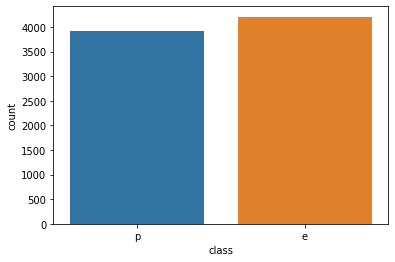

In [21]:
x = data['class']
ax = sns.countplot(x=x, data=data)

The code **x = data['class']** extracts the column of data with the label "class" from the pandas dataframe data and assigns it to the variable x.

The code **ax = sns.countplot(x=x, data=data) **creates a countplot using the Seaborn library, which is a barplot that shows the count of each unique value in a categorical variable.

The **x parameter** specifies the categorical variable to be plotted, which in this case is the x variable that was previously extracted from the data dataframe.

The **data parameter** specifies the dataframe that the categorical variable is coming from, which is also data in this case.

The resulting plot is stored in the variable ax, which can be used to further customize the plot or to display it using the plt.show() function from matplotlib.pyplot.

In [22]:
def plot_data(hue, data):
  for i, col in enumerate(data.columns):
    plt.figure(i)
    ax = sns.countplot(x=data[col], hue=hue, data=data)

 function named **plot_data** that takes two parameters:

**hue:** a string specifying the name of the column to be used for coloring the countplot. This is the column that contains the categorical variable that will be used to group the data and color the bars in the plot.

**data:** a pandas dataframe containing the data to be plotted.

**data dataframe** and creates a separate countplot for each column, with the specified hue parameter.

The **enumerate function** is used to get the index of each column in the data dataframe, which is used to create a separate figure for each plot (i.e., plt.figure(i)).

The **sns.countplot function** is used to create the countplots, with the x parameter set to the name of the column (col) and the hue parameter set to the specified hue parameter. The data parameter is set to the data dataframe.

Resulting plot for each column is stored in the variable ax, but it is not returned by the function. If the function is called, it will simply create a series of countplots for each column in the dataframe with the specified hue parameter.


<ipython-input-22-085cb35836e6>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-22-085cb35836e6>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


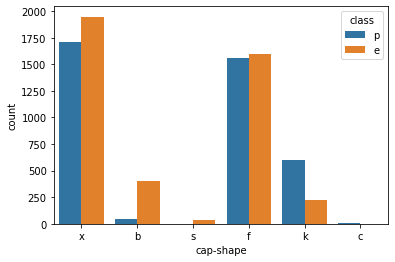

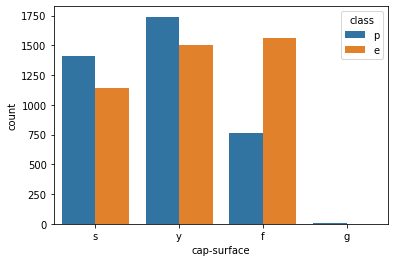

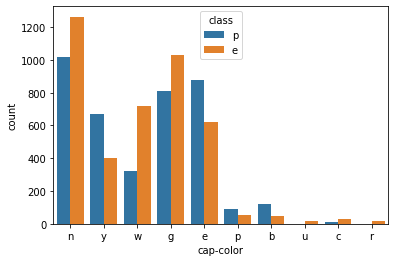

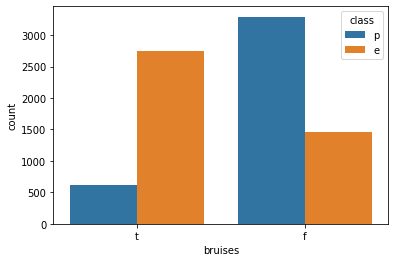

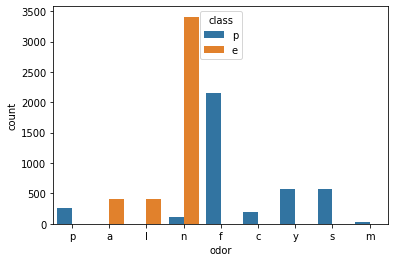

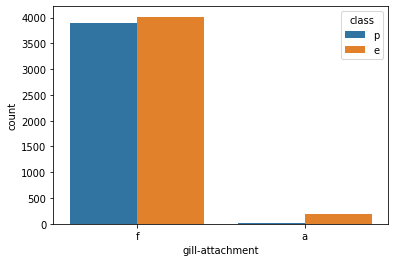

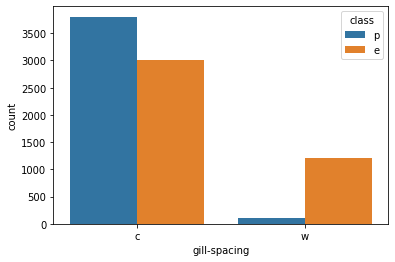

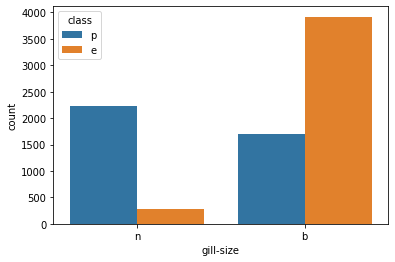

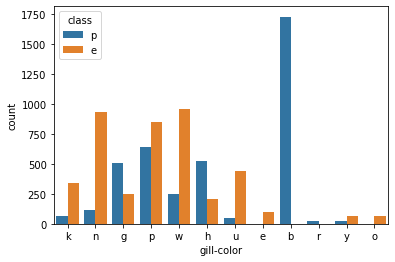

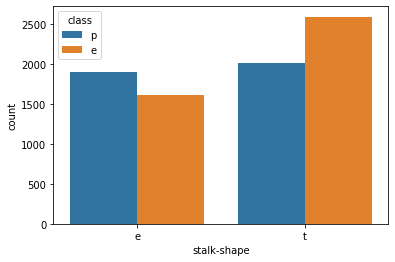

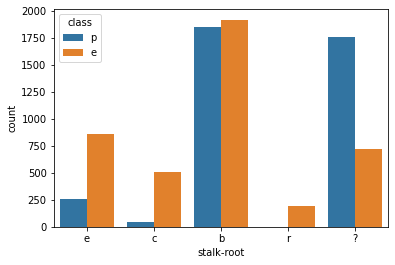

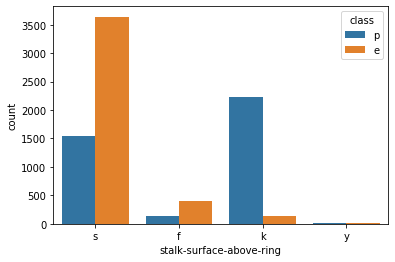

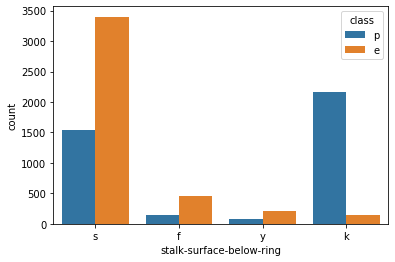

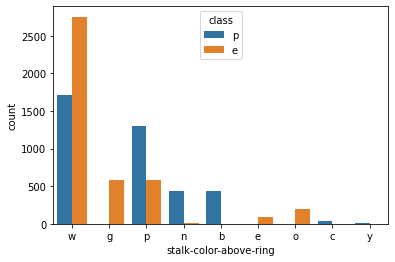

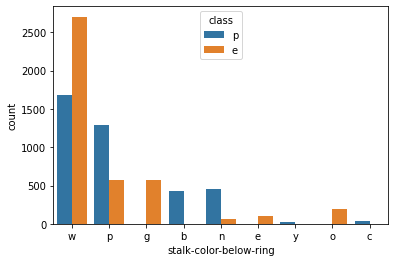

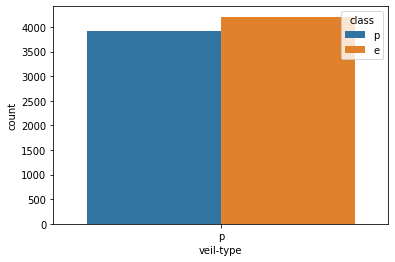

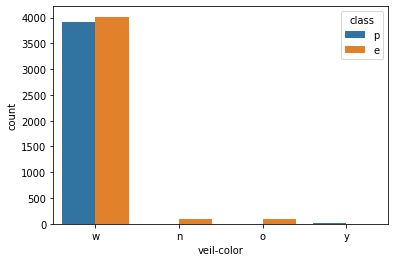

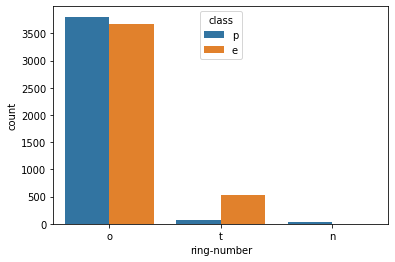

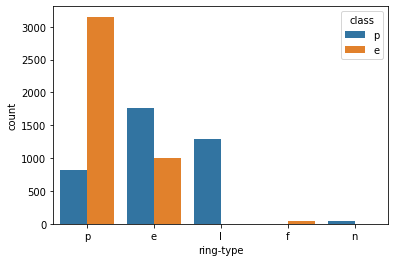

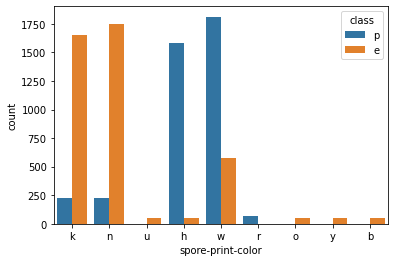

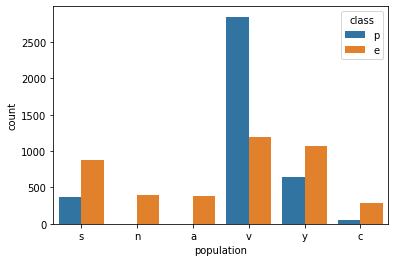

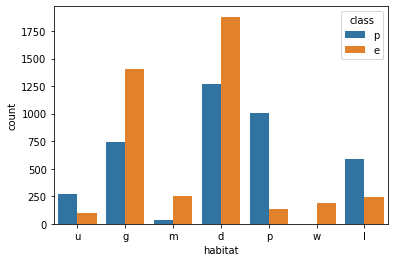

In [23]:
hue = data['class']
data_to_plot = data.drop('class', axis=1)
plot_data(hue, data_to_plot)

The code creates a new variable named hue that extracts the column of data with the label "class" from the pandas dataframe data and assigns it to hue. This is the column that will be used for coloring the countplots.

The code also creates a new dataframe named data_to_plot that drops the column with the label "class" from the data dataframe, and assigns it to data_to_plot. This new dataframe contains all of the columns from the original data dataframe except for the "class" column.

The function plot_data is then called with the hue and data_to_plot variables as arguments. This will create a series of countplots, one for each column in data_to_plot, with the "class" column used for coloring the bars in the plot.

##Preprocessing




In [24]:
for col in data.columns:
  print(f"{col}: {data[col].isnull().sum()}")

class: 0
cap-shape: 0
cap-surface: 0
cap-color: 0
bruises: 0
odor: 0
gill-attachment: 0
gill-spacing: 0
gill-size: 0
gill-color: 0
stalk-shape: 0
stalk-root: 0
stalk-surface-above-ring: 0
stalk-surface-below-ring: 0
stalk-color-above-ring: 0
stalk-color-below-ring: 0
veil-type: 0
veil-color: 0
ring-number: 0
ring-type: 0
spore-print-color: 0
population: 0
habitat: 0


The code loops through each column in the pandas dataframe data, and for each column it prints out the number of missing values using the isnull() method to find missing values and sum() method to count them.

The output will be a series of lines, with one line for each column in data. Each line will show the name of the column (col), followed by a colon, and then the number of missing values in that column. 

In [25]:
 le = LabelEncoder()
 data['class'] = le.fit_transform(data['class'])
 data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The code first creates an instance of the **LabelEncoder** class and assigns it to the variable le.

The code then uses the fit_transform method of the **LabelEncoder** object to encode the values in the "class" column of the pandas dataframe data. The fit_transform method fits the encoder to the data and transforms the data in a single step. The fit_transform method replaces the values in the "class" column with encoded integer values.

The resulting dataframe is printed to the screen using the head() method of the data dataframe. This shows the first few rows of the transformed dataframe.

The **LabelEncoder** is often used to convert categorical variables into numerical variables for use in machine learning algorithms. By default, LabelEncoder assigns a unique integer value to each unique category in the input data. This can be useful for algorithms that require numerical input data, but it is important to keep in mind that the encoding is arbitrary and does not necessarily reflect any underlying relationship between categories.




In [32]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


##Modelling

In [35]:
y = data['class'].values.reshape(-1,1)
X = encoded_data.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The code first creates a variable y by selecting the "class" column from the pandas dataframe data using indexing, and then reshaping it using the reshape method of numpy array. The reshape method is used to convert the shape of the numpy array from a 1D array to a 2D array with a single column. This is necessary because scikit-learn expects the target variable to be in a 2D array format.

The code then creates a variable X by dropping the "class" column from the pandas dataframe encoded_data using the drop method with the axis parameter set to 1. This creates a new dataframe with all of the columns from encoded_data except for the "class" column.

The code then uses the train_test_split function from scikit-learn to split the data into training and test sets. The test_size parameter is set to 0.2, which means that 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state parameter is set to 42 to ensure reproducibility of the results.

The train_test_split function returns four numpy arrays: X_train, X_test, y_train, and y_test. These arrays contain the training and test sets for the input features (X_train and X_test) and the target variable (y_train and y_test).

In [36]:
##First Algorithmn for CLASSIFICATION

##Logistic Regression

1st Algorithmn of Classification


In [37]:
from sklearn.linear_model import LogisticRegression

The sklearn.linear_model module provides a variety of linear models for use in regression and classification problems.

In [38]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train.ravel())
y_prob = logistic_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

The code creates an instance of the LogisticRegression class and assigns it to the variable logistic_reg. The fit method of the LogisticRegression class is then used to fit the model to the training data. The fit method takes the input features in X_train and the target variable in y_train, which has been flattened to a 1D array using the ravel method.

After fitting the model, the code uses the predict_proba method of the LogisticRegression object to predict the probability of the positive class (class 1) for each example in the test set X_test. The predict_proba method returns a 2D numpy array where each row corresponds to an example in the test set and each column corresponds to a class. The first column corresponds to the probability of the negative class (class 0) and the second column corresponds to the probability of the positive class (class 1). The probability values are between 0 and 1 and sum to 1 for each row.

The code then selects the second column of the output of predict_proba using indexing ([:,1]) to get the predicted probability of the positive class for each example in the test set. These probabilities are stored in the variable y_prob.

Finally, the code uses the np.where function to convert the predicted probabilities in y_prob to binary predictions (y_pred) by applying a threshold of 0.5. If the predicted probability of the positive class is greater than 0.5, the corresponding binary prediction is 1, otherwise it is 0.




In [39]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix

array([[843,   0],
       [  0, 782]])

The confusion_matrix function from scikit-learn is used to calculate a confusion matrix for the binary classification problem. The function takes two arguments: the true labels (y_test) and the predicted labels (y_pred).

The code calculates the confusion matrix for the logistic regression model by calling confusion_matrix with y_test and y_pred as arguments and assigning the result to the variable log_confusion_matrix. The confusion matrix is a 2x2 numpy array that shows the number of true positives, true negatives, false positives, and false negatives. The rows of the matrix correspond to the actual class labels, and the columns correspond to the predicted class labels.

In [40]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

The code calculates the Receiver Operating Characteristic (ROC) curve for the logistic regression model. The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different thresholds of a binary classifier. The ROC curve is created by plotting the TPR against the FPR at various threshold values.

The roc_curve function from scikit-learn is used to calculate the FPR, TPR, and threshold values for the ROC curve. The function takes two arguments: the true labels (y_test) and the predicted probabilities for the positive class (y_prob).

The auc function from scikit-learn is used to calculate the area under the ROC curve (AUC) for the logistic regression model. The auc function takes the FPR and TPR values as arguments.

The FPR, TPR, and threshold values are assigned to the variables false_positive_rate, true_positive_rate, and threshold, respectively. The AUC is assigned to the variable roc_auc.

In [43]:
def plot_roc(roc_auc):
  plt.figure(figsize=(7,7))
  plt.title('Reciever Operating Characterstics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
  plt.legend(loc='lower_right')
  plt.plot([0,1], [0,1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')


The code defines a function plot_roc that takes the AUC value as an argument and plots the ROC curve. The function uses the false_positive_rate and true_positive_rate arrays calculated by the roc_curve function, as well as the roc_auc value calculated by the auc function.

The function first creates a figure with a title "Receiver Operating Characteristics" and sets the figure size to (7,7). It then plots the ROC curve using plt.plot and the false_positive_rate and true_positive_rate arrays as x and y values, respectively. The color of the curve is set to red and a label is added to the curve showing the AUC value.

The function then adds a legend to the plot, plots the diagonal line representing a random classifier (TPR = FPR), and sets the axis limits and labels.

<ipython-input-43-17486f57f990>:5: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='lower_right')


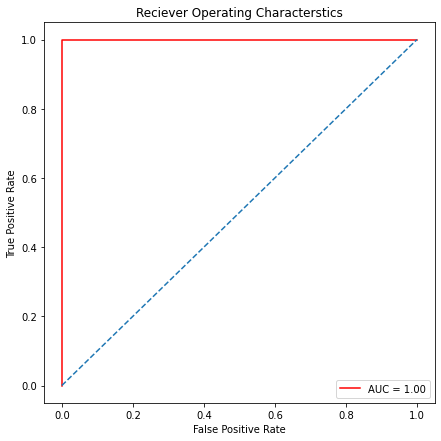

In [44]:
plot_roc(roc_auc)

##Linear Discriminant Analysis (LDA)

>2nd Algorithmn of Classisfication

Same procedures would be repeated like Logistic Regression, just the algorithmn has changed.


In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0) 



In [47]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

1.0

<ipython-input-43-17486f57f990>:5: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='lower_right')


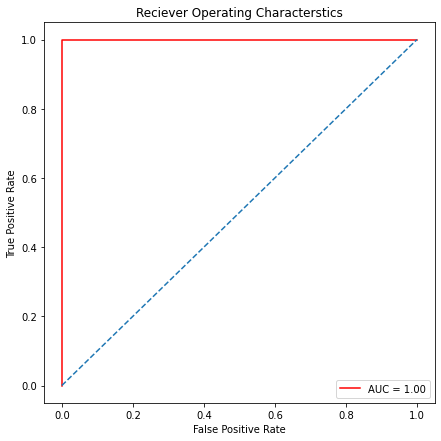

In [50]:
plot_roc(roc_auc_lda)

##Quadratic Discriminant Analysis (QDA)

3rd Algorithmn of Classification



In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [53]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())
y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0) 


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [54]:
qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [55]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

1.0

<ipython-input-43-17486f57f990>:5: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='lower_right')


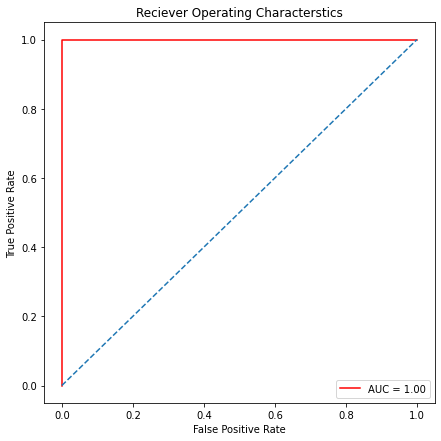

In [57]:
plot_roc(roc_auc_qda)